In [1]:
#Using code from https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D

import pandas as pd
import json
import librosa
#import librosa.display
import numpy as np
#import matplotlib.pyplot as plt
import tensorflow as tf
#from matplotlib.pyplot import specgram
import os


/Users/lucaslyon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/lucaslyon/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
def dataBuilder():
    
    #pulls in JSON files Jim Schwoebel provided of features of audio data
    #returns list of features for each emotion
    #return lists: angryData, disgustData, fearData, happyData, neutralData, sadData, surpriseData
    
    angryJSONFiles = os.listdir('emotion_train_set/angry')
    angryJSONFiles.sort()
    angryData=[]
    for file in angryJSONFiles:
        try:
            with open('emotion_train_set/angry/'+file) as json_data:
                d = json.load(json_data)
                angryData.append(d['features'])
        except: pass
    disgustJSONFiles = os.listdir('emotion_train_set/disgust')
    disgustJSONFiles.sort()
    disgustData=[]
    for file in disgustJSONFiles:
        try:
            with open('emotion_train_set/disgust/'+file) as json_data:
                d = json.load(json_data)
                disgustData.append(d['features'])
        except: pass

    fearJSONFiles = os.listdir('emotion_train_set/fear')
    fearJSONFiles.sort()
    fearData=[]
    for file in fearJSONFiles:
        try:
            with open('emotion_train_set/fear/'+file) as json_data:
                d = json.load(json_data)
                fearData.append(d['features'])
        except: pass

    happyJSONFiles = os.listdir('emotion_train_set/happy')
    happyJSONFiles.sort()
    happyData=[]
    for file in happyJSONFiles:
        try:
            with open('emotion_train_set/happy/'+file) as json_data:
                d = json.load(json_data)
                happyData.append(d['features'])
        except: pass

    neutralJSONFiles = os.listdir('emotion_train_set/neutral')
    neutralJSONFiles.sort()
    neutralData=[]
    for file in neutralJSONFiles:
        try:
            with open('emotion_train_set/neutral/'+file) as json_data:
                d = json.load(json_data)
                neutralData.append(d['features'])
        except: pass

    sadJSONFiles = os.listdir('emotion_train_set/sad')
    sadJSONFiles.sort()
    sadData=[]
    for file in sadJSONFiles:
        try:
            with open('emotion_train_set/sad/'+file) as json_data:
                d = json.load(json_data)
                sadData.append(d['features'])
        except: pass

    surpriseJSONFiles = os.listdir('emotion_train_set/surprise')
    surpriseJSONFiles.sort()
    surpriseData=[]
    for file in surpriseJSONFiles:
        try:
            with open('emotion_train_set/surprise/'+file) as json_data:
                d = json.load(json_data)
                surpriseData.append(d['features'])
        except: pass
    
    return angryData, disgustData, fearData, happyData, neutralData, sadData, surpriseData
    
    


In [4]:
def buildDataFrame(angryData, disgustData, fearData, happyData, neutralData, sadData, surpriseData):

    #takes in lists of features
    #returns a fully populated and labeled emotion dataframe
    
    angryDf = pd.DataFrame(angryData)
    disgustDf = pd.DataFrame(disgustData)
    fearDf = pd.DataFrame(fearData)
    happyDf = pd.DataFrame(happyData)
    neutralDf = pd.DataFrame(neutralData)
    sadDf = pd.DataFrame(sadData)
    surpriseDf = pd.DataFrame(surpriseData)

    angryDf['label'] = 0 #'angry'
    disgustDf['label'] = 1 #'disgust'
    fearDf['label'] = 2 #'fear'
    happyDf['label'] = 3 #'happy'
    neutralDf['label'] = 4 #'neutral'
    sadDf['label'] = 5 #'sad'
    surpriseDf['label'] = 6 #'surprise'

    emotionsDf = pd.concat([angryDf, disgustDf, fearDf, happyDf, neutralDf, sadDf, surpriseDf])
    
    return emotionsDf

In [5]:
#angry, disgust, fear, happy, neutral, sad, surprise = dataBuilder()
#emotionsDf = buildDataFrame(angry, disgust, fear, happy, neutral, sad, surprise)
#emotionsDf.to_csv('emotionsDfV1.csv', index=False)
emotionsDf = pd.read_csv('emotionsDfV1.csv')

In [7]:
from sklearn.utils import shuffle
shuffledDf = shuffle(emotionsDf)

divider = np.random.rand(len(shuffledDf)) < 0.95
train = shuffledDf[divider]
test = shuffledDf[~divider]

trainfeatures = train.iloc[:, :-1]
trainlabels = train.iloc[:, -1:]

testfeatures = test.iloc[:, :-1]
testlabels = test.iloc[:, -1:]

x_train = np.array(trainfeatures)
y_train = np.array(trainlabels)
x_test = np.array(testfeatures)
y_test = np.array(testlabels)

#flattening the arrays
y_train = np.hstack(y_train)
y_test = np.hstack(y_test)

#convert class vectors to binary class matrices.
num_classes = 7
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_test = np.expand_dims(x_test, axis=2)
x_train = np.expand_dims(x_train, axis=2)

x_train shape: (6392, 272)
6392 train samples
328 test samples


x_train shape: (5674, 272)
5674 train samples
1046 test samples


In [15]:
model = Sequential()
model.add(Conv1D(32, 5, padding='same',
                 input_shape=(272,1)))
model.add(Activation('relu'))
model.add(Conv1D(32, 5))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv1D(64, 5, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 5))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
metrics=['accuracy'])

In [16]:

batch_size = 32
epochs = 100

model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test))

Train on 5660 samples, validate on 1060 samples
Epoch 1/100
5660/5660 [==============================] - 7s 1ms/step - loss: 3.2815 - acc: 0.2182 - val_loss: 1.7941 - val_acc: 0.2632
Epoch 2/100
5660/5660 [==============================] - 6s 1ms/step - loss: 1.7974 - acc: 0.2360 - val_loss: 1.7621 - val_acc: 0.2802
Epoch 3/100
5660/5660 [==============================] - 6s 1ms/step - loss: 1.7610 - acc: 0.2527 - val_loss: 1.7504 - val_acc: 0.2802
Epoch 4/100
5660/5660 [==============================] - 6s 1ms/step - loss: 1.7350 - acc: 0.2509 - val_loss: 1.7276 - val_acc: 0.2915
Epoch 5/100
5660/5660 [==============================] - 6s 1ms/step - loss: 1.7198 - acc: 0.2675 - val_loss: 1.7611 - val_acc: 0.2783
Epoch 6/100
5660/5660 [==============================] - 6s 1ms/step - loss: 1.7056 - acc: 0.2689 - val_loss: 1.7439 - val_acc: 0.2802
Epoch 7/100
5660/5660 [==============================] - 6s 1ms/step - loss: 1.6973 - acc: 0.2684 - val_loss: 1.7416 - val_acc: 0.3104
Epoch 8

Epoch 61/100
5660/5660 [==============================] - 6s 1ms/step - loss: 1.5387 - acc: 0.3723 - val_loss: 1.6525 - val_acc: 0.3123
Epoch 62/100
5660/5660 [==============================] - 6s 1ms/step - loss: 1.5398 - acc: 0.3758 - val_loss: 1.6499 - val_acc: 0.3217
Epoch 63/100
5660/5660 [==============================] - 6s 1ms/step - loss: 1.5345 - acc: 0.3714 - val_loss: 1.6516 - val_acc: 0.3094
Epoch 64/100
5660/5660 [==============================] - 6s 1ms/step - loss: 1.5392 - acc: 0.3760 - val_loss: 1.6541 - val_acc: 0.3085
Epoch 65/100
5660/5660 [==============================] - 6s 1ms/step - loss: 1.5398 - acc: 0.3742 - val_loss: 1.6542 - val_acc: 0.3000
Epoch 66/100
5660/5660 [==============================] - 6s 1ms/step - loss: 1.5324 - acc: 0.3818 - val_loss: 1.6534 - val_acc: 0.3113
Epoch 67/100
5660/5660 [==============================] - 6s 1ms/step - loss: 1.5302 - acc: 0.3820 - val_loss: 1.6505 - val_acc: 0.3075
Epoch 68/100
5660/5660 [========================

In [8]:
#Adjusting dropout layer from 0.25 to 0.75
#remving some massive 500 neuron layers
model = Sequential()
model.add(Conv1D(32, 5, padding='same',
                 input_shape=(272,1)))
model.add(Activation('relu'))
model.add(Conv1D(32, 5))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(64, 5, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 5))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
metrics=['accuracy'])

In [10]:

batch_size = 32
epochs = 10

model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test))

Train on 5674 samples, validate on 1046 samples
Epoch 1/10
5674/5674 [==============================] - 4s 759us/step - loss: 6.2644 - acc: 0.2076 - val_loss: 1.8210 - val_acc: 0.2151
Epoch 2/10
5674/5674 [==============================] - 4s 705us/step - loss: 2.3633 - acc: 0.2180 - val_loss: 1.7860 - val_acc: 0.2543
Epoch 3/10
5674/5674 [==============================] - 4s 690us/step - loss: 1.7966 - acc: 0.2462 - val_loss: 1.7729 - val_acc: 0.2753
Epoch 4/10
5674/5674 [==============================] - 4s 695us/step - loss: 1.7358 - acc: 0.2522 - val_loss: 1.7408 - val_acc: 0.2782
Epoch 5/10
5674/5674 [==============================] - 4s 699us/step - loss: 1.7266 - acc: 0.2543 - val_loss: 1.7277 - val_acc: 0.2830
Epoch 6/10
5674/5674 [==============================] - 4s 719us/step - loss: 1.7069 - acc: 0.2651 - val_loss: 1.7400 - val_acc: 0.2925
Epoch 7/10
5674/5674 [==============================] - 4s 714us/step - loss: 1.7069 - acc: 0.2688 - val_loss: 1.7231 - val_acc: 0.3031


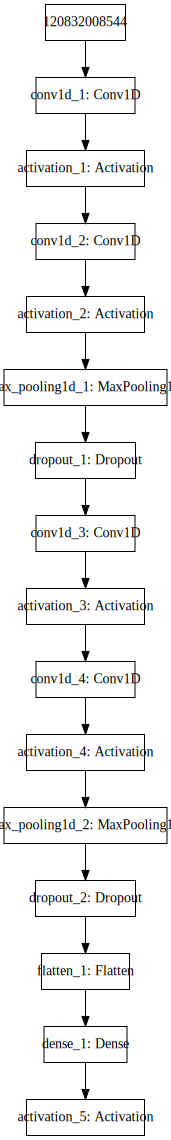

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [8]:
#removing extraneous layers
model = Sequential()
model.add(Conv1D(32, 5, padding='same',
                 input_shape=(272,1)))
model.add(Activation('relu'))
model.add(Conv1D(32, 5))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(64, 5, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
metrics=['accuracy'])


batch_size = 32
epochs = 100

model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test))

Train on 6392 samples, validate on 328 samples
Epoch 1/100
6392/6392 [==============================] - 3s 490us/step - loss: 9.7426 - acc: 0.2198 - val_loss: 4.2777 - val_acc: 0.2439
Epoch 2/100
6392/6392 [==============================] - 3s 448us/step - loss: 6.6238 - acc: 0.2171 - val_loss: 1.8140 - val_acc: 0.2439
Epoch 3/100
6392/6392 [==============================] - 3s 443us/step - loss: 2.8477 - acc: 0.2167 - val_loss: 1.7186 - val_acc: 0.2683
Epoch 4/100
6392/6392 [==============================] - 3s 437us/step - loss: 1.9085 - acc: 0.2369 - val_loss: 1.7396 - val_acc: 0.2744
Epoch 5/100
6392/6392 [==============================] - 3s 452us/step - loss: 1.7433 - acc: 0.2625 - val_loss: 1.7326 - val_acc: 0.3079
Epoch 6/100
6392/6392 [==============================] - 3s 447us/step - loss: 1.7092 - acc: 0.2674 - val_loss: 1.7156 - val_acc: 0.3140
Epoch 7/100
6392/6392 [==============================] - 3s 451us/step - loss: 1.6898 - acc: 0.2814 - val_loss: 1.7235 - val_acc: 0

6392/6392 [==============================] - 3s 455us/step - loss: 1.6119 - acc: 0.3404 - val_loss: 1.7539 - val_acc: 0.2957
Epoch 61/100
6392/6392 [==============================] - 3s 434us/step - loss: 1.6144 - acc: 0.3335 - val_loss: 1.7716 - val_acc: 0.2835
Epoch 62/100
6392/6392 [==============================] - 3s 442us/step - loss: 1.6119 - acc: 0.3373 - val_loss: 1.7570 - val_acc: 0.3018
Epoch 63/100
6392/6392 [==============================] - 3s 456us/step - loss: 1.6146 - acc: 0.3395 - val_loss: 1.7626 - val_acc: 0.2744
Epoch 64/100
6392/6392 [==============================] - 3s 444us/step - loss: 1.6077 - acc: 0.3437 - val_loss: 1.7495 - val_acc: 0.2957
Epoch 65/100
6392/6392 [==============================] - 3s 447us/step - loss: 1.6107 - acc: 0.3406 - val_loss: 1.7808 - val_acc: 0.2774
Epoch 66/100
6392/6392 [==============================] - 3s 477us/step - loss: 1.6084 - acc: 0.3439 - val_loss: 1.7790 - val_acc: 0.2774
Epoch 67/100
6392/6392 [=======================